In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
import numpy as np
tf.config.run_functions_eagerly(True)

In [397]:
df = pd.read_csv("philly.csv")
df.drop('Sunrise', inplace=True, axis=1)
df.drop('Sunset', inplace=True, axis=1)
df.drop('Sky Conditions', inplace=True, axis=1)
df = df.fillna(-1)
df.head()

,DATE,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Pressure Change,Pressure Tendency,Humidity,Station Pressure,Visibility,Wet Bulb Temp,Wind Direction,Wind Speed
0,01.01.2018 00:54,10.0,30.41,-5.0,0.0,-0.01,3.0,50.0,30.38,10.00,7.0,300.0,6.0
1,01.01.2018 01:00,10.0,-1.00,-5.0,-1.0,-0.01,3.0,50.0,30.35,9.94,7.0,300.0,6.0
2,01.01.2018 01:54,9.0,30.42,-5.0,0.0,-1.00,-1.0,52.0,30.39,10.00,7.0,320.0,7.0
3,01.01.2018 02:54,10.0,30.42,-6.0,0.0,-1.00,-1.0,48.0,30.39,10.00,7.0,310.0,8.0
4,01.01.2018 03:54,9.0,30.42,-6.0,0.0,-0.01,0.0,50.0,30.39,10.00,6.0,310.0,7.0


In [391]:
keys = [
    "Dry Bulb Temp",
    "Altitude",
    "Dew Point Temp",
    "Precipitation",
    "Pressure Change",
    "Pressure Tendency",
    "Humidity",
    "Station Pressure",
    "Visibility",
    "Wet Bulb Temp",
    "Wind Direction",
    "Wind Speed",
]

labels = [
    "Tdry (degF)",
    "Tdew (degF)",
    "alt",
    "rain (in)",
    "pChange (Hg)",
    "pTend (Hg)",
    "hum (%)",
    "p (Hg)",
    "vis (mi)",
    "Twet (degF)",
    "wDir (deg)",
    "wSpeed (mph)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]
dateTime_key = "DATE"

In [392]:
df.dtypes

DATE                  object
Dry Bulb Temp        float64
Altitude             float64
Dew Point Temp       float64
Precipitation        float64
Pressure Change      float64
Pressure Tendency    float64
Humidity             float64
Station Pressure     float64
Visibility           float64
Wet Bulb Temp        float64
Wind Direction       float64
Wind Speed           float64
dtype: object

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40590 entries, 0 to 40589
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               40590 non-null  object 
 1   Dry Bulb Temp      39447 non-null  float64
 2   Altitude           35099 non-null  float64
 3   Dew Point Temp     39445 non-null  float64
 4   Precipitation      27385 non-null  float64
 5   Pressure Change    13028 non-null  float64
 6   Pressure Tendency  13028 non-null  float64
 7   Humidity           39445 non-null  float64
 8   Station Pressure   39124 non-null  float64
 9   Visibility         39452 non-null  float64
 10  Wet Bulb Temp      39122 non-null  float64
 11  Wind Direction     38391 non-null  float64
 12  Wind Speed         39448 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.0+ MB


In [394]:
for key in keys[0:]:
    print(key)
    df[key] = df[key].astype(float)

Dry Bulb Temp
Altitude
Dew Point Temp
Precipitation
Pressure Change
Pressure Tendency
Humidity
Station Pressure
Visibility
Wet Bulb Temp
Wind Direction
Wind Speed


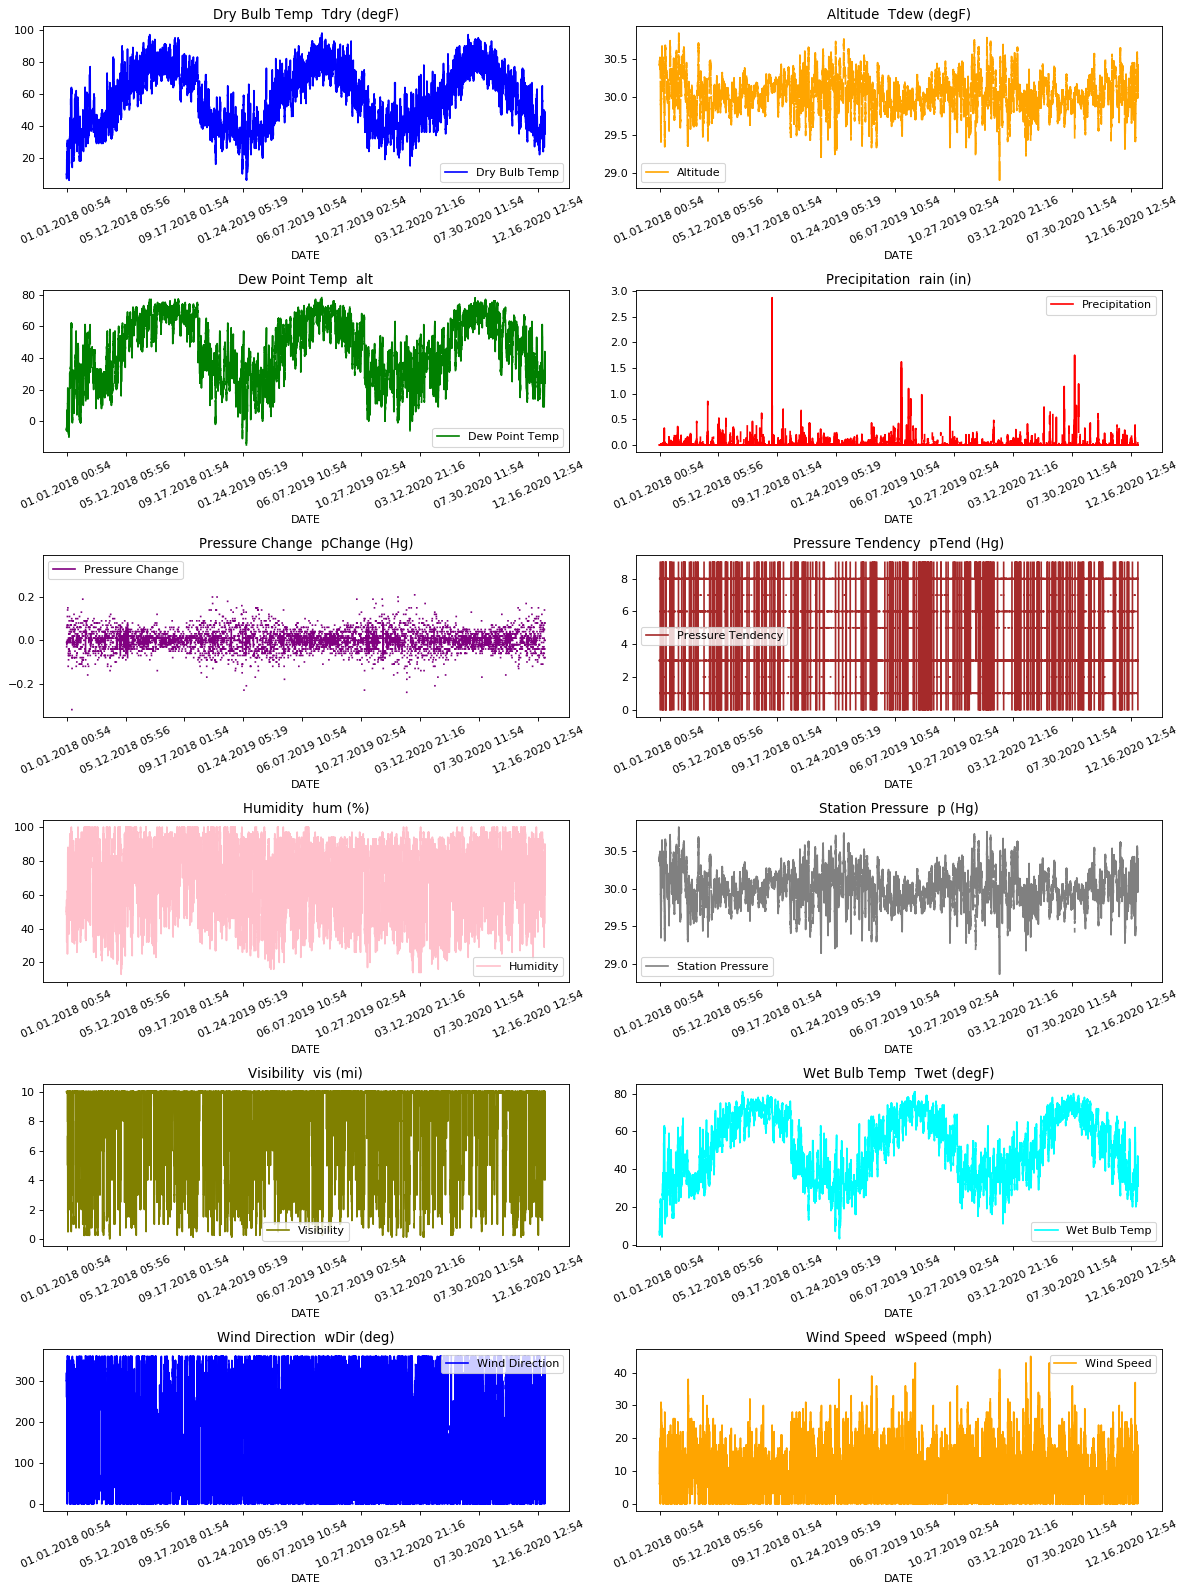

In [395]:
def show_raw_visualization(data):
    time_data = data[dateTime_key]
    fig, axes = plt.subplots(
        nrows= 6, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(keys)):
        key = keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title=keys[i] + "  " + labels[i],
            rot=25,
        )
        ax.legend([keys[i]])
    plt.tight_layout()


show_raw_visualization(df)

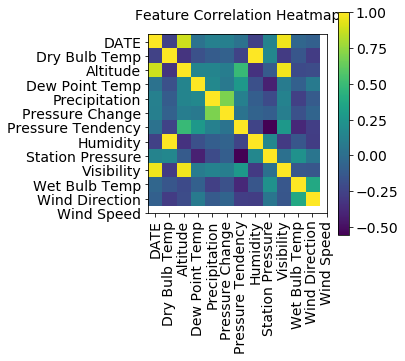

In [396]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [365]:
usableFeatures = [keys[i] for i in [0,1,2,3,5,6,7,11]]
features = df[usableFeatures]
features.index = df[dateTime_key]
features.head()

,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Pressure Tendency,Humidity,Station Pressure,Wind Speed
DATE,,,,,,,,
01.01.2018 00:54,10.0,30.41,-5.0,0.0,3.0,50.0,30.38,6.0
01.01.2018 01:00,10.0,-1.00,-5.0,-1.0,3.0,50.0,30.35,6.0
01.01.2018 01:54,9.0,30.42,-5.0,0.0,-1.0,52.0,30.39,7.0
01.01.2018 02:54,10.0,30.42,-6.0,0.0,-1.0,48.0,30.39,8.0
01.01.2018 03:54,9.0,30.42,-6.0,0.0,0.0,50.0,30.39,7.0


In [377]:
std = features.std()
avg = features.mean()
features=(features-features.mean())/features.std()
features.head()

,Dry Bulb Temp,Altitude,Dew Point Temp,Precipitation,Pressure Tendency,Humidity,Station Pressure,Wind Speed
DATE,,,,,,,,
01.01.2018 00:54,-2.314822,0.431098,-2.461428,0.662687,0.726426,-0.767499,0.259037,-0.474976
01.01.2018 01:00,-2.314822,-2.527678,-2.461428,-1.432131,0.726426,-0.767499,0.253855,-0.474976
01.01.2018 01:54,-2.365808,0.432040,-2.461428,0.662687,-0.585927,-0.682054,0.260765,-0.299171
01.01.2018 02:54,-2.314822,0.432040,-2.510915,0.662687,-0.585927,-0.852943,0.260765,-0.123366
01.01.2018 03:54,-2.365808,0.432040,-2.510915,0.662687,-0.257839,-0.767499,0.260765,-0.299171


In [367]:
#create training set and testing set

split = 0.9
splitPoint = int(len(df) * split)

trainingSet = features[:splitPoint].values
testSet = features[splitPoint:].values

In [368]:
#12-hour prediction using last 48hours of data

x_train = []
y_train = []
n_future = 12
n_past = 48

for i in range(0, len(trainingSet) - n_past - n_future + 1):
 x_train.append(trainingSet[i : i + n_past, 0])
 y_train.append(trainingSet[i + n_past : i + n_past + n_future, 0])
    


In [369]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))

In [370]:
model = Sequential()

model.add(Bidirectional(LSTM(units=48, return_sequences=True, input_shape = (x_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(units= 48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 48, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 48))
model.add(Dropout(0.2))
model.add(Dense(units = n_future, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)



C:\Users\gtray\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/5
1140/1140 [==============================] - 313s 274ms/step - loss: 0.7226 - accuracy: 0.2338
Epoch 2/5
1140/1140 [==============================] - 306s 268ms/step - loss: 0.6526 - accuracy: 0.2924
Epoch 3/5
1140/1140 [==============================] - 294s 258ms/step - loss: 0.6352 - accuracy: 0.3137
Epoch 4/5
1140/1140 [==============================] - 292s 257ms/step - loss: 0.6392 - accuracy: 0.3240
Epoch 5/5
1140/1140 [==============================] - 290s 255ms/step - loss: 0.6236 - accuracy: 0.3302


In [382]:
x_test = testSet[: n_past, 0]
y_test = testSet[n_past : n_past + n_future, 0]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

In [386]:
predicted_temperature = model.predict(x_test)
print('Predicted temperature {}'.format(predicted_temperature))
print('Real temperature {}'.format(y_test))

Predicted temperature [[0.81832886 0.8060033  0.8553636  0.90820575 0.94104636 0.9622062
  0.98222184 1.0279274  1.0144887  1.0466149  1.0514884  1.0642614 ]]
Real temperature [1.10127124 1.10127124 1.15225771 1.10127124 1.10127124 1.15225771
 1.10127124 0.99929831 0.94831184 0.89732538 0.89732538 0.89732538]


[[0.81832886 0.8060033  0.8553636  0.90820575 0.94104636 0.9622062
  0.98222184 1.0279274  1.0144887  1.0466149  1.0514884  1.0642614 ]]
